<a href="https://colab.research.google.com/github/rishik312004/Ris_hik/blob/main/testing_quality_of_medicines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

In [ ]:
data_train_path='/content/drive/MyDrive/mint/mint/train'
data_test_path='/content/drive/MyDrive/mint/mint/test'

In [ ]:
img_width=180
img_height=180

In [ ]:
data_train=tf.keras.utils.image_dataset_from_directory(data_train_path,image_size=(img_width,img_height),shuffle=True,batch_size=32,
                                                       validation_split=False)

Found 782 files belonging to 3 classes.


In [ ]:
data_cat=data_train.class_names

In [ ]:
data_test=tf.keras.utils.image_dataset_from_directory(data_test_path,image_size=(img_width,img_height),shuffle=True,batch_size=32,
                                                      validation_split=False)


Found 168 files belonging to 3 classes.


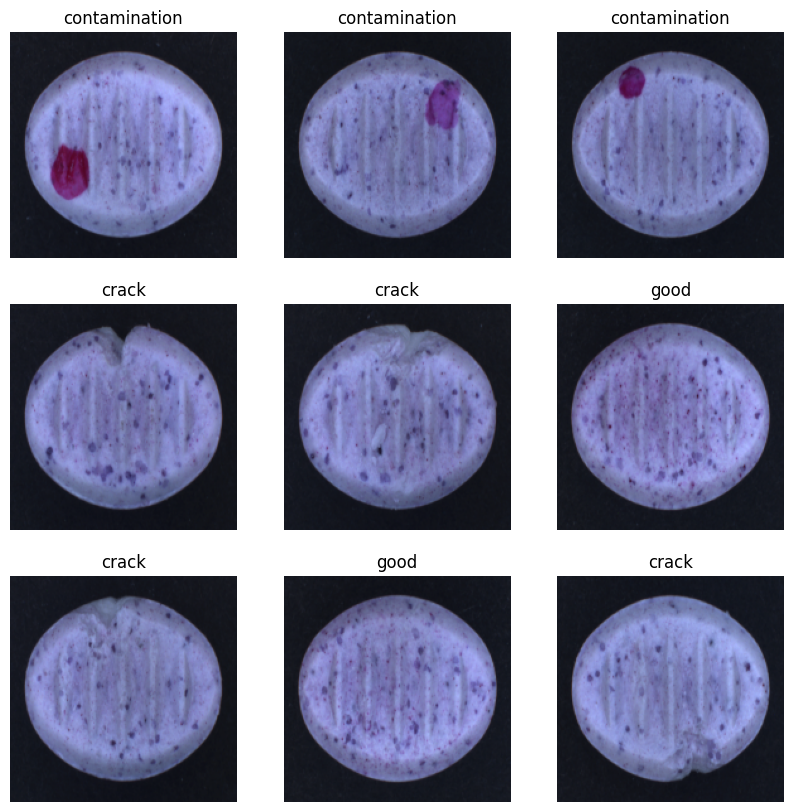

In [ ]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(data_cat[labels[i]])
    plt.axis('off')

In [ ]:
#BUILDING MODEL USING FUNCTIONAL API
input_layer=layers.Input(shape=(img_width,img_height,3))
x=layers.Conv2D(filters=16,kernel_size=3,activation='relu')(input_layer)
x=layers.BatchNormalization()(x)
x= layers.MaxPooling2D()(x)
x=layers.Conv2D(filters=32,kernel_size=3,activation='relu')(input_layer)
x=layers.BatchNormalization()(x)
x=layers.MaxPooling2D()(x)
x=layers.Conv2D(filters=64,kernel_size=3,activation='relu')(input_layer)
x=layers.BatchNormalization()(x)
x=layers.MaxPooling2D()(x)
x=layers.Flatten()(x)
x=layers.Dense(64,activation='relu')(x)
x=layers.Dropout(0.5)(x)
output_layer=layers.Dense(len(data_cat),activation='softmax')(x)
model=models.Model(input_layer,output_layer)


In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history=model.fit(data_train,epochs=25,batch_size=32,verbose=1)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


25/25 ━━━━━━━━━━━━━━━━━━━━ 186s 7s/step - accuracy: 0.2837 - loss: 91.3479
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 107s 4s/step - accuracy: 0.3296 - loss: 1.0982
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - accuracy: 0.3359 - loss: 1.0967
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 135s 4s/step - accuracy: 0.3324 - loss: 1.0956
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 91s 4s/step - accuracy: 0.3541 - loss: 1.0980
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.3324 - loss: 1.0986
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.3584 - loss: 1.0926
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 156s 4s/step - accuracy: 0.3299 - loss: 1.0378
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 92s 4s/step - accuracy: 0.3487 - loss: 1.0983
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 92s 4s/step - accuracy: 0.3402 - loss: 1.0986
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.3598 - loss: 1.0980
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.3424 - loss

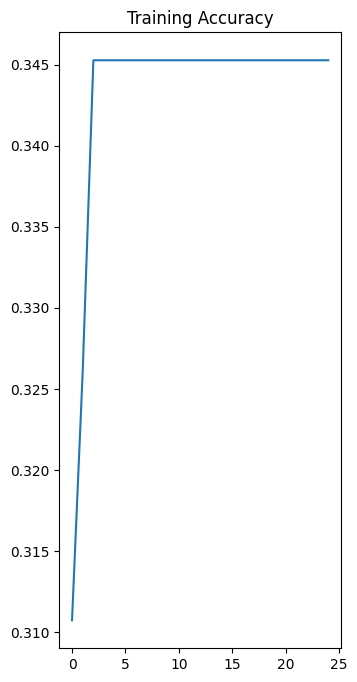

In [ ]:
epochs_range=range(25)
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
#plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Training Accuracy')
plt.show()

In [ ]:
image_path='/content/drive/MyDrive/mint/mint/test/contamination/pill_mint_contamination_015.png'
image=tf.keras.utils.load_img(image_path,target_size=(img_width,img_height))
img_arr=tf.keras.utils.img_to_array(image)
img_bat=tf.expand_dims(img_arr,0)

In [ ]:
predict=model.predict(img_bat)
score=tf.nn.softmax(predict)
print('image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
image is contamination with accuracy of 33.61


In [ ]:
model.save('pill.keras')